<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">t-Distributed Stochastic Neighbor Embedding</h1>
</div>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

<div style="border: 2px solid blue; background-color: #f0f8ff; border-radius: 10px; padding: 15px;">
    <h2 style="color: blue;">Understanding t-SNE (t-Distributed Stochastic Neighbor Embedding)</h2>
    <p style="font-size: 16px; color: navy;">
        t-SNE, short for t-Distributed Stochastic Neighbor Embedding, is a powerful technique used for visualizing high-dimensional data in a low-dimensional space. It is particularly useful for exploring and understanding complex datasets, especially those with nonlinear structures.
    </p>
    <p style="font-size: 16px; color: navy;">
        At its core, t-SNE aims to preserve the local structure of the data by modeling pairwise similarities between data points in both the high-dimensional and low-dimensional spaces. It accomplishes this by minimizing the divergence between the conditional probabilities of pairwise similarities in the original space and the low-dimensional space.
    </p>
    <p style="font-size: 16px; color: navy;">
        Unlike PCA, which focuses on preserving global variance, t-SNE emphasizes the preservation of local relationships and clusters within the data. This makes it particularly effective for visualizing clusters and identifying underlying patterns or groupings in the data.
    </p>
    <p style="font-size: 16px; color: navy;">
        Throughout this notebook, we will delve into the intuition behind t-SNE, its key parameters, and how to interpret its results. We will also explore practical implementations of t-SNE using Python and popular libraries like scikit-learn. By the end, you will have a solid understanding of t-SNE's capabilities and how to leverage it for data visualization and exploration tasks.
    </p>
</div>


<div style="border: 2px solid black; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;"> Mathematical Explanation of t-SNE(t-Distributed Stochastic Neighbor Embedding)</h2>
    <p style="font-size: 16px;">
        t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique used for visualizing high-dimensional data in a low-dimensional space. Unlike PCA, which focuses on preserving global variance, t-SNE aims to preserve local similarities and clusters within the data.
    </p>
    <h3 style="color: purple;">Key Steps in t-SNE:</h3>
    <ol style="font-size: 16px;">
        <li><b>Compute Pairwise Similarities:</b> Calculate pairwise similarities between data points in the high-dimensional space using a Gaussian kernel.</li>
        <li><b>Construct Similarity Matrix:</b> Construct a similarity matrix based on the computed pairwise similarities.</li>
        <li><b>Compute Conditional Probabilities:</b> Convert the similarity matrix into conditional probabilities that represent the probability of choosing a point as a neighbor given another point as a center.</li>
        <li><b>Optimize Low-Dimensional Embedding:</b> Define a cost function to measure the mismatch between conditional probabilities in the high-dimensional and low-dimensional spaces. Optimize the embedding by minimizing this cost function using gradient descent.</li>
    </ol>
    <h3 style="color: purple;">Mathematical Formulation:</h3>
    <p style="font-size: 16px;">
        Given a dataset \( X \) with \( n \) observations and \( p \) variables, t-SNE involves the following mathematical steps:
    </p>
    <ul style="font-size: 16px;">
        <li><b>Compute Pairwise Similarities:</b> \( p_{j|i} = \frac{\exp(-\lVert x_i - x_j \rVert^2 / 2 \sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert x_i - x_k \rVert^2 / 2 \sigma_i^2)} \)</li>
        <li><b>Construct Similarity Matrix:</b> \( P_{ij} = \frac{p_{j|i} + p_{i|j}}{2n} \)</li>
        <li><b>Compute Conditional Probabilities:</b> \( q_{ij} = \frac{(1 + \lVert y_i - y_j \rVert^2)^{-1}}{\sum_{k \neq l} (1 + \lVert y_k - y_l \rVert^2)^{-1}} \)</li>
        <li><b>Optimize Low-Dimensional Embedding:</b> Minimize the Kullback-Leibler divergence between the distributions \( P \) and \( Q \) using gradient descent.</li>
    </ul>
    <p style="font-size: 16px;">
        Overall, t-SNE iteratively optimizes the low-dimensional embedding to best capture the local relationships and structures present in the high-dimensional data, resulting in a visually informative representation for visualization and exploration.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Applying t-SNE to the MNIST Dataset</h2>
    <p style="font-size: 16px;">
        To demonstrate the utility of t-SNE (t-Distributed Stochastic Neighbor Embedding), we will apply it to the MNIST dataset. The MNIST dataset consists of 60,000 images of handwritten digits (0-9), where each image is represented as a 28x28 pixel grid, resulting in 784 features per image.
    </p>
    <p style="font-size: 16px;">
        Our objective is to reduce the dimensionality of the MNIST data from 784 dimensions to 2 dimensions using t-SNE. This reduction allows us to visualize the data in a 2D scatter plot, where each point represents an image of a digit. We will utilize different colors to indicate the different categories (labels) in the scatter plot. The labels in the MNIST dataset range from 0 to 9, corresponding to the digit each image represents.
    </p>
    <p style="font-size: 16px;">
        By reducing the dimensionality and visualizing the data in this manner, we can gain insights into the structure and distribution of the digit images. We can observe how different digits cluster together and assess the effectiveness of the t-SNE transformation in capturing the local relationships within the data.
    </p>
    <p style="font-size: 16px;">
        Below is a scatter plot of the MNIST dataset after applying t-SNE to reduce the dimensions to 2. Each point in the plot represents an image, and the color indicates the digit label (0-9).
    </p>
</div>


In [8]:
mnist_data = pd.read_csv(r'C:\D\Python\Python-Projects\PYTORCH_NOTEBOOKS\PYTORCH_NOTEBOOKS\mnist_train_csv\mnist_train.csv')

mnist_data = mnist_data.sample(6000)

C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


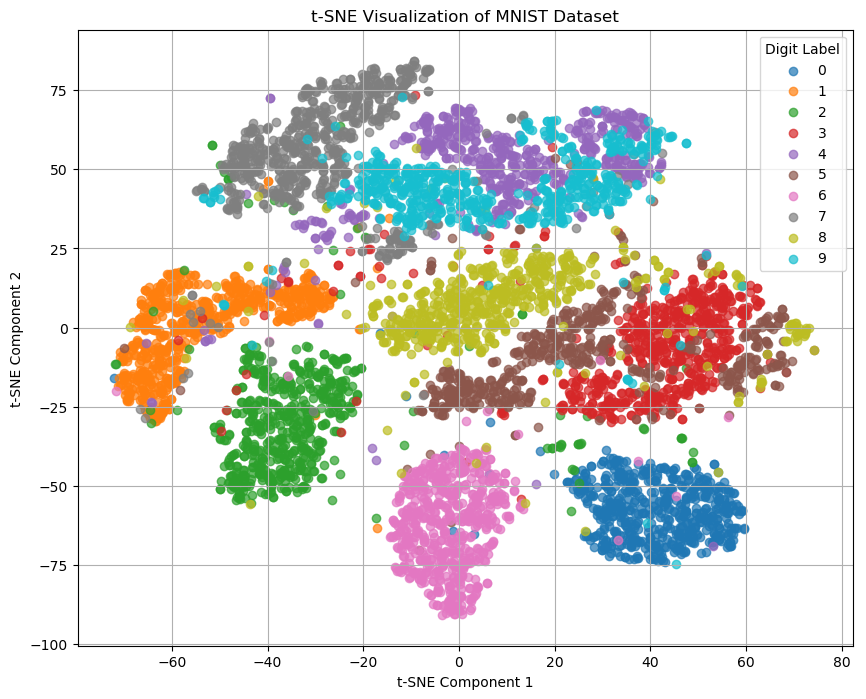

In [9]:
# Extract labels from the first column
labels = mnist_data.values[ : , 0 ]

# Remove labels from the data
data  =  mnist_data.values[ : , 1: ] 

# Apply t-SNE to reduce dimensionality to 2
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    plt.scatter(data_tsne[labels == label, 0], data_tsne[labels == label, 1], label=str(label), alpha=0.7)
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit Label')
plt.grid(True)
plt.show()


<div style="border: 2px solid darkgreen;  border-radius: 10px;  background-color: #C7F6C7; padding: 15px;">
    <h2 style="color: darkgreen;">Standardization in t-SNE</h2>
    <p style="font-size: 16px; color: darkgreen;">
        t-Distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique that aims to preserve local similarities between data points in a high-dimensional space when projecting them onto a lower-dimensional space (often 2D or 3D). Unlike some other dimensionality reduction methods, such as PCA, t-SNE does not rely on the covariance matrix or the scale of the input features.
    </p>
    <p style="font-size: 16px; color: darkgreen;">
        Since t-SNE operates on pairwise similarities or distances between data points rather than the original features themselves, it does not require standardization of the input data. t-SNE is inherently robust to the scale of the features and can handle data with varying ranges and variances without the need for preprocessing.
    </p>
    <p style="font-size: 16px; color: darkgreen;">
        However, while standardization is not necessary for t-SNE, it may still be beneficial in certain cases, especially if the input features have vastly different variances or if the dataset contains features of different types. In such cases, standardization can help ensure that the input data is on a similar scale, which may improve the performance and stability of the t-SNE algorithm.
    </p>
</div>


<div style="border: 2px solid black; border-radius: 10px; background-color: #f0f0f0; padding: 15px;">
<h2 style="color: black;">Comparison between t-SNE and PCA</h2>

<h3 style="color: black;">Use Cases:</h3>
<div style="font-size: 16px; color: black;">
<p><b>t-SNE:</b></p>
<ul>
<li>Visualization of high-dimensional data in a lower-dimensional space, particularly for exploring local structure and clustering.</li>
<li>Effective for exploratory data analysis, especially with complex datasets such as images, text, or genetic data.</li>
<li>Reveals intricate structures and patterns that may not be easily discernible in the original high-dimensional space.</li>
</ul>
<p><b>PCA:</b></p>
<ul>
<li>Dimensionality reduction and feature extraction in machine learning and data analysis.</li>
<li>Preprocessing data before feeding it into other algorithms to reduce computational complexity and enhance model performance.</li>
<li>Data compression, noise reduction, and identifying the most informative features in a dataset.</li>
</ul>
</div>

<h3 style="color: black;">Advantages and Disadvantages:</h3>
<div style="font-size: 16px; color: black;">
<p><b>t-SNE:</b></p>
<ul>
<li><b>Advantages:</b>
<ul>
<li>Captures complex nonlinear relationships between data points.</li>
<li>Preserves local structure and cluster relationships well in visualization.</li>
<li>Effective for exploring and understanding the local structure of high-dimensional data.</li>
</ul>
</li>
<li><b>Disadvantages:</b>
<ul>
<li>High computational complexity, especially for large datasets.</li>
<li>Sensitive to the choice of hyperparameters, such as perplexity.</li>
<li>Provides insights into local relationships and may not preserve global structure accurately.</li>
</ul>
</li>
</ul>
<p><b>PCA:</b></p>
<ul>
<li><b>Advantages:</b>
<ul>
<li>Efficient for dimensionality reduction, especially when the number of features is much larger than the number of samples.</li>
<li>Linear transformation ensures fast computation and stable results.</li>
<li>Captures the maximum variance in the data and preserves global structure well.</li>
</ul>
</li>
<li><b>Disadvantages:</b>
<ul>
<li>Assumes linear relationships between variables, which may not always hold true.</li>
<li>May not capture complex nonlinear structures present in the data.</li>
<li>Loss of interpretability in the reduced feature space compared to the original features.</li>
</ul>
</li>
</ul>
</div>

<h3 style="color: black;">Time Complexity:</h3>
<div style="font-size: 16px; color: black;">
<p><b>t-SNE:</b> \( O(N^2) \), where \( N \) is the number of data points.</p>
<p><b>PCA:</b> \( O(N^2d + d^3) \), where \( N \) is the number of samples and \( d \) is the number of features.</p>
</div>

<h3 style="color: black;">Stability of Results:</h3>
<div style="font-size: 16px; color: black;">
<p>PCA tends to produce consistent results upon rerunning, while t-SNE results may vary due to stochastic initialization.</p>
</div>
</div>
